In [1]:
# Experiments to Understand Over fitting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
import sklearn

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.pipeline import make_pipeline

In [9]:
housing = pd.read_csv('datas/housing.csv')

In [10]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
len(housing.index)

545

In [12]:
df = housing.loc[:, ['area', 'price']]
df

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000
...,...,...
540,3000,1820000
541,2400,1767150
542,3620,1750000
543,2910,1750000


In [13]:
df_columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [14]:
df = pd.DataFrame(df)
df.columns = df_columns
df.head(9)

,area,price
0,0.396564,1.000000
1,0.502405,0.909091
2,0.571134,0.909091
3,0.402062,0.906061
4,0.396564,0.836364
5,0.402062,0.787879
6,0.476289,0.727273
7,1.000000,0.727273
8,0.443299,0.703030


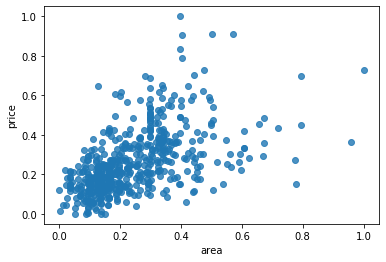

In [15]:
sns.regplot(x = 'area', y = 'price', data = df, fit_reg = False)

In [16]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 10)

In [17]:
print(len(df_train))
print(len(df_test))

381
164


In [18]:
X_train = df_train['area']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['price']

X_test = df_test['area']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['price']

In [19]:
len(X_train)

381

In [20]:
# Fit multiple polynomial Features

In [21]:
degrees = [1, 2, 3, 6, 10, 20]

y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    y_train_pred[:, 1] = model.predict(X_train)
    y_test_pred[:, 1] = model.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


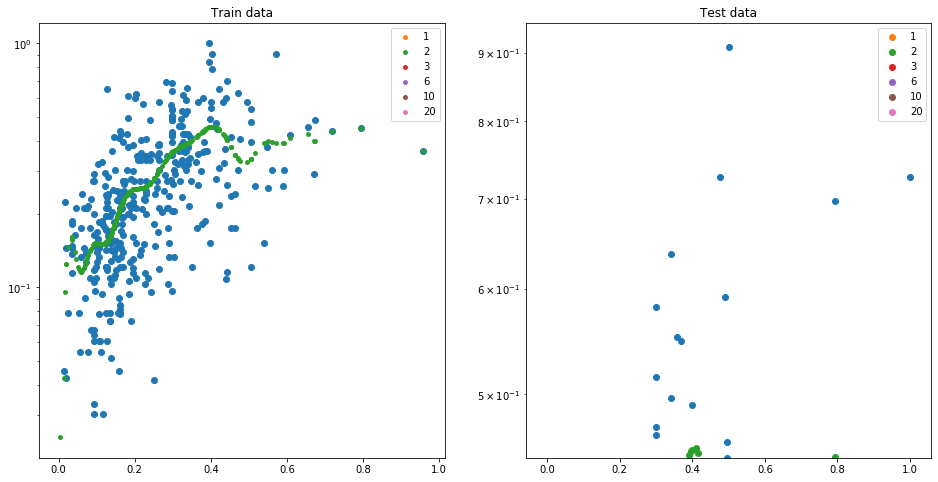

In [22]:
# Train data

plt.figure(figsize = (16, 8))

plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title('Train data')
for i, degree in enumerate(degrees):
    plt.scatter(X_train, y_train_pred[:, i], s = 15, label = str(degree))
    plt.legend(loc = 'upper_left')
    

# Test data


plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title('Test data')
for i, degree in enumerate(degrees):
    plt.scatter(X_test, y_test_pred[:, i], label = str(degree))
    plt.legend(loc = 'upper_left')

In [23]:
print("R-Squared_values: \n")

for i, degree in enumerate(degrees):
    
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train_score = {1}, test_score = {2}".format(degree, train_r2, test_r2))
    

R-Squared_values: 

Polynomial degree 1: train_score = -2.49, test_score = -2.95
Polynomial degree 2: train_score = 0.38, test_score = -307071892461.64
Polynomial degree 3: train_score = -2.49, test_score = -2.95
Polynomial degree 6: train_score = -2.49, test_score = -2.95
Polynomial degree 10: train_score = -2.49, test_score = -2.95
Polynomial degree 20: train_score = -2.49, test_score = -2.95


In [24]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
binary_vars_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes' : 1, 'no' : 0})

housing[binary_vars_list] = housing[binary_vars_list].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [26]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [31]:
housing = pd.concat([housing, status], axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [27]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [28]:
# Splitting into Train and Test

In [29]:
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

scaler = MinMaxScaler()
numeric_vars = ['area', 'bedrooms', 'bathrooms', 'parking', 'price', 'basement']
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
359,0.169697,0.155227,0.4,0.0,1,1,0,0.0,0,0,0.333333,0
19,0.615152,0.403379,0.4,0.5,2,1,0,0.0,0,1,0.333333,1
159,0.321212,0.115628,0.4,0.5,1,1,1,1.0,0,1,0.000000,0
35,0.548133,0.454417,0.4,0.5,4,1,0,0.0,0,1,0.666667,0
28,0.575758,0.538015,0.8,0.5,2,1,0,1.0,1,0,0.666667,0


In [34]:
df_test[numeric_vars] = scaler.fit_transform(df_test[numeric_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,0.247651,0.084536,0.333333,0.000000,2,1,0,0.0,0,0,0.000000,1
54,0.530201,0.298969,0.333333,0.333333,2,1,1,0.0,0,1,0.333333,0
171,0.328859,0.592371,0.333333,0.000000,1,1,0,0.0,0,0,0.333333,1
244,0.261745,0.252234,0.333333,0.000000,2,1,1,1.0,0,0,0.000000,1
268,0.245638,0.226804,0.666667,0.000000,2,1,0,0.0,0,1,0.000000,0


In [35]:
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

In [36]:
len(X_train.columns)

11

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 10)
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 2),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1)]

In [39]:
y_pred = rfe.predict(X_test)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5812051458999574


In [42]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 6)
rfe = rfe.fit(X_train, y_train)

y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5009813482220877


In [43]:
# K - Fold CV

In [44]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring = 'r2', cv = 5)
scores

array([0.68352455, 0.69655703, 0.65765918, 0.6204225 , 0.59532168])

In [46]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring = 'r2', cv = 5)
scores

array([0.68352455, 0.69655703, 0.65765918, 0.6204225 , 0.59532168])

In [48]:
scores = cross_val_score(lm, X_train, y_train, scoring='mean_squared_error', cv = 5)
scores

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [51]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

hyper_params = [{'n_features_to_select': list(range(1, 14))}]

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring = 'r2',
                        verbose = 1,
                        cv = folds,
                        return_train_score=True)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.6s finished
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [52]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015359,0.006199,0.002196,0.001165,1,{'n_features_to_select': 1},0.172606,0.351721,0.206887,0.165910,...,0.243471,0.077611,13,0.302971,0.265961,0.280611,0.300768,0.269025,0.283867,0.015506
1,0.009183,0.000747,0.001796,0.000744,2,{'n_features_to_select': 2},0.335665,0.428751,0.439969,0.505321,...,0.438090,0.058533,12,0.505799,0.489802,0.462091,0.474178,0.471907,0.480755,0.015355
2,0.014835,0.006490,0.001996,0.000630,3,{'n_features_to_select': 3},0.389710,0.463651,0.457439,0.521380,...,0.461541,0.042494,11,0.524524,0.513053,0.492947,0.501071,0.501538,0.506627,0.011005
3,0.008378,0.001493,0.001398,0.000487,4,{'n_features_to_select': 4},0.395332,0.535600,0.459618,0.495172,...,0.470242,0.046211,10,0.558789,0.561329,0.541182,0.508998,0.562985,0.546657,0.020383
4,0.007182,0.000746,0.001595,0.000488,5,{'n_features_to_select': 5},0.477900,0.562430,0.452251,0.442807,...,0.485556,0.042262,9,0.606383,0.571032,0.551567,0.586407,0.594806,0.582039,0.019102
5,0.006783,0.000399,0.000999,0.000004,6,{'n_features_to_select': 6},0.511690,0.609159,0.538724,0.461403,...,0.528409,0.047793,8,0.616147,0.605313,0.600002,0.626417,0.606079,0.610792,0.009397
6,0.006382,0.000490,0.001198,0.000399,7,{'n_features_to_select': 7},0.551131,0.657572,0.577926,0.531865,...,0.576014,0.043373,7,0.644287,0.624318,0.625892,0.642935,0.634803,0.634447,0.008304
7,0.005425,0.000538,0.001197,0.000402,8,{'n_features_to_select': 8},0.550096,0.650772,0.587865,0.525522,...,0.579678,0.042287,6,0.651910,0.633024,0.628651,0.651323,0.638915,0.640765,0.009442
8,0.004586,0.000491,0.001196,0.000398,9,{'n_features_to_select': 9},0.546220,0.644095,0.606220,0.548420,...,0.590221,0.037739,5,0.660872,0.642452,0.659579,0.655898,0.664321,0.656624,0.007581
9,0.004589,0.000487,0.001702,0.000395,10,{'n_features_to_select': 10},0.574376,0.693197,0.601972,0.615504,...,0.623427,0.039735,4,0.686032,0.661729,0.674558,0.674187,0.669439,0.673189,0.007915


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


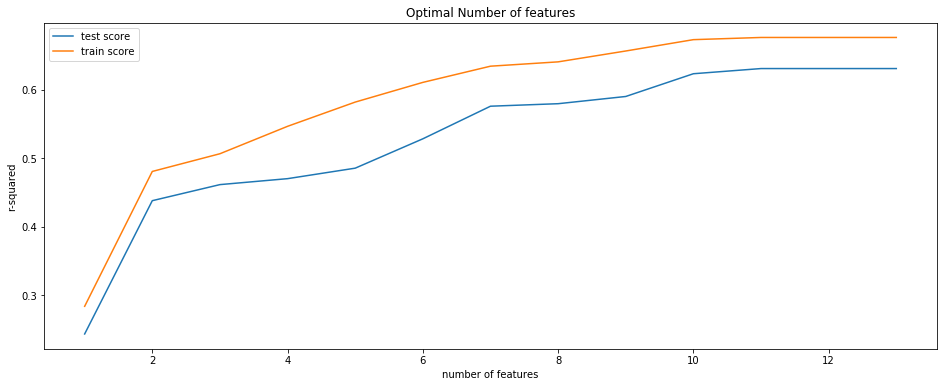

In [53]:
plt.figure(figsize = (16, 6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel("number of features")
plt.ylabel("r-squared")
plt.title("Optimal Number of features")
plt.legend(['test score', 'train score'], loc = 'upper_left')

In [55]:
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = n_features_optimal)
rfe = rfe.fit(X_train, y_train)

y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5891899434207541
